<center>
 <h1> Análisis de Datos - Parque automotor Paysandú-UY </h1>
</center>

<center>
    <img src="https://raw.githubusercontent.com/monkodev/DataScience/main/Ds.jpg" width="350" alt="Logo Data Science - Malugani"  />
    <img src="https://raw.githubusercontent.com/monkodev/DataScience/main/paymapa.png" width="200" alt="Mapa Paysandú"  />
</center>

## Objetivo

Se analizan datos sobre el parque automotor de la ciudad de Paysandú - Uruguay.</br>
Se trabaja sobre datos abiertos proporcionados por <a href="https://www.catalogodatos.gub.uy">Catálogo Datos UY</a> </br>
<a href="https://catalogodatos.gub.uy/dataset/idp-parque-automotor-de-paysandu">Fuente de datos de estudio</a>

<div class="alert alert-block alert-success">
<center>
<b>Notebook creado por Giancarlo Malugani</b> </br>
<a href="https://github.com/monkodev/DataScience">Ir al repositorio de GitHub</a>
</center>
</div>

### Diccionario de datos (metadata)

| Nombre del atributo | Descripción | Tipo de Dato |
| --- | --- | --- |
|Provisorio |Temporal o final |String|
|Estado|Indica si el vehiculo está activo o fue dado de baja|String|
|Procedencia|empadronamiento, re-empadronamiento u otro|String|
|Fecha de Ingreso|Fecha del empadronamiento|Date|
|Motivo de Baja|Describe la causa por la que el vehiculo fue dado de baja|String|
|Destino|Descripción del destino del vehiculo en caso que corresponda con el motivo de baja|String|
|Categoria|Categoria de licencias validas:A,B,C,D,E,F,G1,G2,G3,H|String|
|Tipo de Vehiculo|Clasificacion del vehiculo (por ejemplo sedan 4 puertas, camioneta doble cabina, etc)|String|
|Marca|Nombre de la marca|String|
|Modelo|Nombre del modelo|String|
|Combustible|Tipo de combustible utilizado (DIE,ELE,GAS,HIB,NAF,OTR,S/M)|string|
|Ano|Año del modelo|numerico|
|Ejes|Cantidad de ejes |numerico|
|Cilindros|Cantidad de cilindros|numerico|
|Hp|Fuerza en HP|numerico|
|Cilindrada|Cilindrada|numerico|
|Cant. de Ruedas|Cantidad de ruedas|numerico|
|Aire Acondicionado|Equipado con aire S/N |string|
|Tara|Peso del del vehiculo|numerico|
|Seguro|Tipo de seguro contratado al momento de empadronar|String|
|Vigencia|Vigencia del seguro al momento del trámite|date|
|Aseguradora|Aseguradora al momento del trámite|string|
|Titularidad|Indica si el organismo es (TITULAR,GANANCIAL, LEASING, NUDA PROPIEDAD, POSEEDOR, TITULAR)|String|


### Preparando el entorno
Instalación de openpyxl (módulo requerido por pandas)

In [1]:
!mamba install openpyxl==3.0.9 -y


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['openpyxl==3.0.9']

pkgs/r/linux-64          [<=>                 ] (00m:00s) 
pkgs/r/linux-64    

Se importan las librerías panda y numpy

In [2]:
import numpy as np  
import pandas as pd 

Descargamos el archivo en cuestión para cargarlo en el dataframe

In [17]:
df_pdu = pd.read_excel(
    'https://github.com/monkodev/DataScience/blob/main/datasetparqueautomotoripay.xlsx?raw=true',
    sheet_name='datasetparqueautomotoripay',
    engine='openpyxl')
print('Datos descargados y leidos en el dataframe!')

Datos descargados y leidos en el dataframe!


Comprobamos que el dataframe esté cargado mostrando los primeros registros

In [18]:
df_pdu.head()

,Provisorio,Estado,Procedencia,Fecha de Ingreso,Origen,Motivo de Baja,Destino,Categoria,Tipo de Vehiculo,Marca,...,Cilindros,Hp,Cilindrada,Cant. de Ruedas,Aire Acondicionado,tara,Seguro,Vigencia,ASEGURADORA,TITULARIDAD
0,No,Activo,NUEVO,2013-06-05,Empadronamiento,NaN,NaN,A,CAMIONETA DOBLE CABINA,NISSAN,...,4.0,0.0,2400.0,4.0,S,1800.0,SOA,2014-06-05 00:00:00,BANCO DE SEGUROS DEL ESTADO,TITULAR
1,No,Activo,NUEVO,2019-03-01,Empadronamiento,NaN,NaN,A,CTA. FURGON,PEUGEOT,...,4.0,0.0,1600.0,4.0,S,1200.0,SOA,2020-02-28 00:00:00,MAPFRE URUGUAY COMPAÃ‘IA DE SEG,TITULAR
2,No,Activo,NUEVO,2019-04-01,Empadronamiento,NaN,NaN,A,SEDAN 4 PUERTAS,CITROEN,...,4.0,0.0,1560.0,4.0,S,1000.0,SOA,2022-03-18 00:00:00,PORTO SEGUROS-SEGUROS DEL URUG,TITULAR
3,No,Activo,NUEVO,2019-07-01,Empadronamiento,NaN,NaN,A,HATCH 5 PUERTAS,PEUGEOT,...,4.0,0.0,1600.0,4.0,S,1000.0,SOA,2020-06-26 00:00:00,B.S.E.,TITULAR
4,No,Activo,NUEVO,2019-07-01,Empadronamiento,NaN,NaN,A,RURAL 5 PUERTAS,RENAULT,...,4.0,0.0,2000.0,4.0,S,1200.0,SOA,2020-06-17 00:00:00,PORTO SEGUROS-SEGUROS DEL URUG,TITULAR


....y también que coincidan las ultimas filas

In [20]:
df_pdu.tail()

,Provisorio,Estado,Procedencia,Fecha de Ingreso,Origen,Motivo de Baja,Destino,Categoria,Tipo de Vehiculo,Marca,...,Cilindros,Hp,Cilindrada,Cant. de Ruedas,Aire Acondicionado,tara,Seguro,Vigencia,ASEGURADORA,TITULARIDAD
146275,No,Activo,NUEVO,1999-12-31,Empadronamiento,NaN,NaN,A,CASA AUTOMOVIL,REMOLQUES S/P/P,...,0.0,0.0,0.0,2.0,N,NaN,NaN,NaN,NaN,TITULAR
146276,No,Activo,NUEVO,1998-01-01,Empadronamiento,NaN,NaN,C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SOA,2020-09-25 00:00:00,PORTO SEGUROS-SEGUROS DEL URUG,TITULAR
146277,No,Activo,REEMPADRONAMIENTO,2019-11-12,Reempadronamiento,NaN,CANELONES,E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SOA,2020-10-24 00:00:00,SURA / ROYAL SUN ALLIANCE,TITULAR
146278,No,Activo,NUEVO,2014-01-14,Empadronamiento,NaN,NaN,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SOA,2020-07-18 00:00:00,B.S.E.,TITULAR
146279,No,Activo,REEMPADRONAMIENTO,2013-12-20,Reempadronamiento,NaN,COLONIA,C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SOA,2020-05-22 00:00:00,PORTO SEGUROS-SEGUROS DEL URUG,TITULAR


In [23]:
print("La dimensión del dataframe es (filas,columnas): ", df_pdu.shape)

La dimensión del dataframe es (filas,columnas):  (146280, 24)


### Limpieza de datos
Eliminamos las columnas "Provisorio" y "HP" ya que contienen información poco relevante

In [24]:
df_pdu.drop(['Provisorio', 'Hp'], axis=1, inplace=True)

Verificamos eliminación

In [25]:
df_pdu.head()

,Estado,Procedencia,Fecha de Ingreso,Origen,Motivo de Baja,Destino,Categoria,Tipo de Vehiculo,Marca,Modelo,...,Ejes,Cilindros,Cilindrada,Cant. de Ruedas,Aire Acondicionado,tara,Seguro,Vigencia,ASEGURADORA,TITULARIDAD
0,Activo,NUEVO,2013-06-05,Empadronamiento,NaN,NaN,A,CAMIONETA DOBLE CABINA,NISSAN,FRONTIER DC NAFTA 4X2 LX C/DH Y A/A,...,2.0,4.0,2400.0,4.0,S,1800.0,SOA,2014-06-05 00:00:00,BANCO DE SEGUROS DEL ESTADO,TITULAR
1,Activo,NUEVO,2019-03-01,Empadronamiento,NaN,NaN,A,CTA. FURGON,PEUGEOT,PARTNER FT 1.6 HDI M69,...,2.0,4.0,1600.0,4.0,S,1200.0,SOA,2020-02-28 00:00:00,MAPFRE URUGUAY COMPAÃ‘IA DE SEG,TITULAR
2,Activo,NUEVO,2019-04-01,Empadronamiento,NaN,NaN,A,SEDAN 4 PUERTAS,CITROEN,C.ELYSEE ES FEEL 16HB5,...,2.0,4.0,1560.0,4.0,S,1000.0,SOA,2022-03-18 00:00:00,PORTO SEGUROS-SEGUROS DEL URUG,TITULAR
3,Activo,NUEVO,2019-07-01,Empadronamiento,NaN,NaN,A,HATCH 5 PUERTAS,PEUGEOT,2008 FELINE 1.6 VTI,...,2.0,4.0,1600.0,4.0,S,1000.0,SOA,2020-06-26 00:00:00,B.S.E.,TITULAR
4,Activo,NUEVO,2019-07-01,Empadronamiento,NaN,NaN,A,RURAL 5 PUERTAS,RENAULT,DUSTER PRIVILEGE 2.0 4X2,...,2.0,4.0,2000.0,4.0,S,1200.0,SOA,2020-06-17 00:00:00,PORTO SEGUROS-SEGUROS DEL URUG,TITULAR


Importando librería Matplotlib

In [30]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [31]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot

mpl.style.use('ggplot')  

# versión debe ser >= 2.0.0
print('Matplotlib version: ', mpl.__version__) 

Matplotlib version:  3.5.0


Se identifica la cantidad de **vehiculos activos** a la fecha, correspondiendo al **73%** del padrón

In [35]:
df_pdu["Estado"].value_counts().to_frame()

,Estado
Activo,106772
Baja,39508


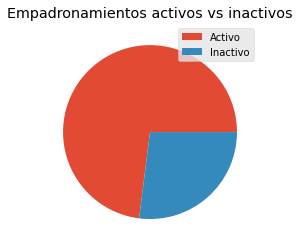

In [50]:
data1=df_pdu["Estado"].value_counts()
plt.pie(data1)
plt.title("Empadronamientos activos vs inactivos")
plt.legend(['Activo', 'Inactivo']) 
plt.shadow=True                              
plt.show()